In [1]:
import numpy as np
import cv2 as cv
import scipy.io
from matplotlib import pyplot as plt

#Triangulation Functions

In [3]:
def triangulate_point(ptsl,ptsr,Pl,Pr):
    """ Point pair triangulation from
    least squares solution. """
    M = np.zeros((6,6))
    M[:3,:4] = Pl
    M[3:,:4] = Pr
    M[:3,4] = -ptsl
    M[3:,5] = -ptsr
    U,S,V = np.linalg.svd(M)
    X = V[-1,:4]
    Y = V[-1]

    return X / X[3]

def triangulate(ptsl,ptsr,Pl,Pr):
    """ Two-view triangulation of points in
    x1,x2 (3*n homog. coordinates). """

    n = ptsl.shape[1]
    if ptsr.shape[1] != n:
      raise ValueError("Number of points don't match.")

    X = [ triangulate_point(ptsl[:,i],ptsr[:,i],Pl,Pr) for i in range(n)]

    return np.array(X).T

#Example

In [5]:
def case_one():
    # Read images
    img1 = cv.imread('001.jpg') #left image
    img2 = cv.imread('002.jpg') #right image

    img_left = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
    img_right = cv.cvtColor(img2,cv.COLOR_BGR2RGB)


    # Read points from file
    points2D = [np.loadtxt('00'+str(i+1)+'.corners').T for i in range(2)]
    # load correspondences
    corr = np.genfromtxt('nview-corners',dtype='int',missing_values='*')

    # index for points in first two views
    ndx = (corr[:,0]>=0) & (corr[:,1]>=0)
    # get coordinates and make homogeneous
    pts_left = points2D[0][:,corr[ndx,0]]
    pts_left = np.vstack( (pts_left,np.ones(pts_left.shape[1])) )
    pts_right = points2D[1][:,corr[ndx,1]]
    pts_right = np.vstack( (pts_right,np.ones(pts_right.shape[1])) )

    # load 3D points
    points3D = np.loadtxt('p3d').T
    Xtrue = points3D[:,ndx]
    Xtrue = np.vstack( (Xtrue,np.ones(Xtrue.shape[1])) )

    # load cameras to a list of Camera objects
    P = [np.loadtxt('00'+str(i+1)+'.P') for i in range(2)]
    Pl = P[0]
    Pr = P[1]

    return img_left,img_right,pts_left,pts_right,Pl,Pr,Xtrue




#Main

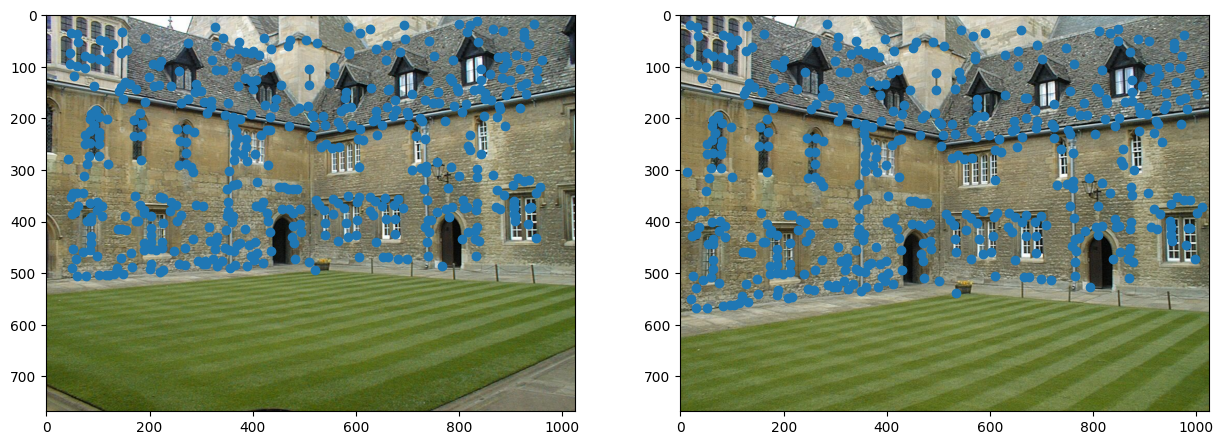

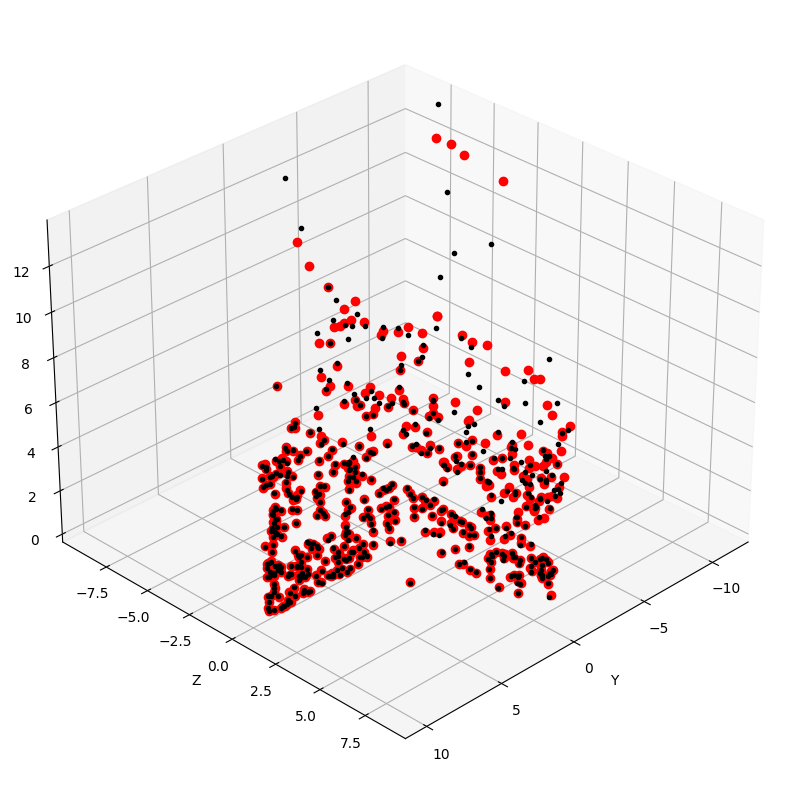

In [6]:
CASE = 1

if CASE == 1:
    img_left,img_right,pts_left,pts_right,Pl,Pr,Xtrue = case_one()



# triangulate the points to obtain 3D coordinates
Xest = triangulate(pts_left,pts_right,Pl,Pr)


# plotting
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.imshow(img_left)
plt.plot(pts_left[0,:],pts_left[1,:],'o')
plt.subplot(122)
plt.imshow(img_right)
plt.plot(pts_right[0,:],pts_right[1,:],'o')


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(Xtrue[1],Xtrue[2],Xtrue[0],'ro')
ax.plot(Xest[1],Xest[2],Xest[0],'k.')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('X')

ax.view_init(elev=30,azim=45)

